# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'E:tasawar\Electrical Engineering\8th semester\Machine learning\Lab\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'E:tasawar\Electrical Engineering\8th semester\Machine learning\Lab\archive(4)\computer vision\train'
validation_dir = r'E:tasawar\Electrical Engineering\8th semester\Machine learning\Lab\archive(4)\computer vision\validation'
test_dir = r'E:tasawar\Electrical Engineering\8th semester\Machine learning\Lab\archive(4)\computer vision\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

e:\ML_Labs\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 372,033 (1.42 MB)

 Trainable params: 372,033 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)



In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(64, 64),batch_size=32,class_mode='binary')

Found 240 images belonging to 2 classes.
Found 93 images belonging to 2 classes.


In [8]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [9]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=20,
                    callbacks=callbacks)

e:\ML_Labs\venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - acc: 0.4127 - loss: 0.7023
Epoch 1: val_loss improved from inf to 0.68774, saving model to E:\Electrical Engineering\8th semester\Machine learning\Lab\\E1-cp-0001-loss0.69.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 865ms/step - acc: 0.4146 - loss: 0.7022 - val_acc: 0.7204 - val_loss: 0.6877
Epoch 2/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - acc: 0.4688 - loss: 0.6926

e:\ML_Labs\venv\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss did not improve from 0.68774
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - acc: 0.4688 - loss: 0.6926 - val_acc: 0.5591 - val_loss: 0.6910
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - acc: 0.5369 - loss: 0.6914
Epoch 3: val_loss did not improve from 0.68774
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 447ms/step - acc: 0.5359 - loss: 0.6914 - val_acc: 0.4301 - val_loss: 0.6942
Epoch 4/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step - acc: 0.5938 - loss: 0.6871
Epoch 4: val_loss did not improve from 0.68774
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step - acc: 0.5938 - loss: 0.6871 - val_acc: 0.3226 - val_loss: 0.7138
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - acc: 0.5408 - loss: 0.6952
Epoch 5: val_loss did not improve from 0.68774
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 446ms/step - acc: 0.5447 - loss: 0.6948 - val_acc: 0.4194 - val_loss: 0.6958
Epoch 6/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - acc: 0.5625 - loss: 0.6815
Epoch 6: val_loss did not improve from 0.68774
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 8

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - acc: 0.4375 - loss: 0.6825 - val_acc: 0.5591 - val_loss: 0.6871
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - acc: 0.5760 - loss: 0.6845
Epoch 9: val_loss did not improve from 0.68709
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 237ms/step - acc: 0.5719 - loss: 0.6845 - val_acc: 0.4086 - val_loss: 0.6952
Epoch 10/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - acc: 0.5312 - loss: 0.6857
Epoch 10: val_loss did not improve from 0.68709
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.5312 - loss: 0.6857 - val_acc: 0.4409 - val_loss: 0.6937
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - acc: 0.5956 - loss: 0.6791
Epoch 11: val_loss did not improve from 0.68709
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - acc: 0.5933 - loss: 0.6790 - val_acc: 0.3656 - val_loss: 0.7013
Epoch 12/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - acc: 0.5000 - loss: 0.6747
Epoch 12: val_loss improved from 0.68709 to 0.68216, saving model to E:\Electrical Engineering\8th semester\Machine lear

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - acc: 0.5000 - loss: 0.6747 - val_acc: 0.5914 - val_loss: 0.6822
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - acc: 0.6356 - loss: 0.6802
Epoch 13: val_loss did not improve from 0.68216
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - acc: 0.6385 - loss: 0.6795 - val_acc: 0.3226 - val_loss: 0.7217
Epoch 14/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - acc: 0.4375 - loss: 0.6929
Epoch 14: val_loss improved from 0.68216 to 0.68133, saving model to E:\Electrical Engineering\8th semester\Machine learning\Lab\\E1-cp-0014-loss0.68.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - acc: 0.4375 - loss: 0.6929 - val_acc: 0.5914 - val_loss: 0.6813
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - acc: 0.6944 - loss: 0.6665
Epoch 15: val_loss improved from 0.68133 to 0.65200, saving model to E:\Electrical Engineering\8th semester\Machine learning\Lab\\E1-cp-0015-loss0.65.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 304ms/step - acc: 0.6907 - loss: 0.6663 - val_acc: 0.7312 - val_loss: 0.6520
Epoch 16/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - acc: 0.7500 - loss: 0.6468
Epoch 16: val_loss did not improve from 0.65200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - acc: 0.7500 - loss: 0.6468 - val_acc: 0.4946 - val_loss: 0.6883
Epoch 17/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - acc: 0.4887 - loss: 0.6827
Epoch 17: val_loss did not improve from 0.65200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - acc: 0.4955 - loss: 0.6817 - val_acc: 0.4516 - val_loss: 0.6962
Epoch 18/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - acc: 0.6875 - loss: 0.6204
Epoch 18: val_loss did not improve from 0.65200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - acc: 0.6875 - loss: 0.6204 - val_acc: 0.3226 - val_loss: 0.7692
Epoch 19/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - acc: 0.5924 - loss: 0.6572
Epoch 19: val_loss improved from 0.65200 to 0.62816, saving model to E:\Electrical Engineering\8th semester\Machine lea

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - acc: 0.5959 - loss: 0.6573 - val_acc: 0.6989 - val_loss: 0.6282
Epoch 20/20
1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - acc: 0.4375 - loss: 0.7117
Epoch 20: val_loss did not improve from 0.62816
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - acc: 0.4375 - loss: 0.7117 - val_acc: 0.7097 - val_loss: 0.6586


In [10]:
model_history.history

{'acc': [0.42788460850715637,
  0.46875,
  0.5288461446762085,
  0.59375,
  0.5721153616905212,
  0.5625,
  0.5144230723381042,
  0.4375,
  0.5432692170143127,
  0.53125,
  0.5769230723381042,
  0.5,
  0.6586538553237915,
  0.4375,
  0.6651785969734192,
  0.75,
  0.5432692170143127,
  0.6875,
  0.620192289352417,
  0.4375],
 'loss': [0.7016699314117432,
  0.6925814747810364,
  0.6912990808486938,
  0.6871496438980103,
  0.6920616626739502,
  0.6814521551132202,
  0.687111496925354,
  0.682503879070282,
  0.6843529939651489,
  0.6857438683509827,
  0.678230881690979,
  0.6746664047241211,
  0.6751697063446045,
  0.6929483413696289,
  0.6648770570755005,
  0.6467764377593994,
  0.6742026209831238,
  0.6203548312187195,
  0.6581860184669495,
  0.7116872072219849],
 'val_acc': [0.7204301357269287,
  0.5591397881507874,
  0.4301075339317322,
  0.32258063554763794,
  0.4193548262119293,
  0.32258063554763794,
  0.32258063554763794,
  0.5591397881507874,
  0.40860214829444885,
  0.44086021184

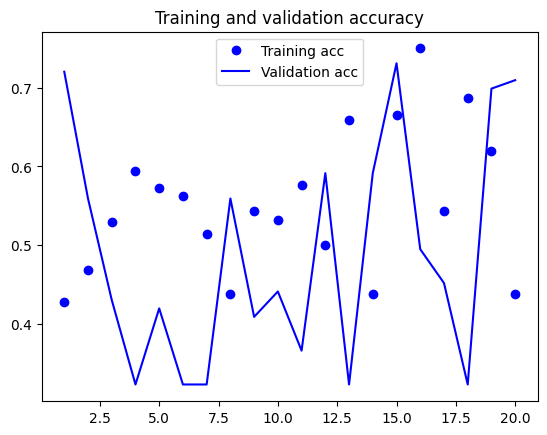

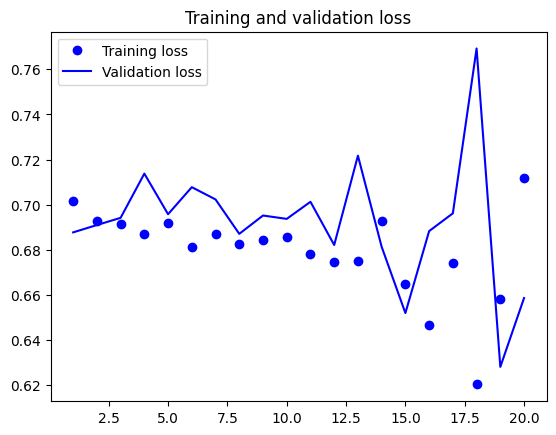

In [11]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_Accuracy.png')

In [12]:
#model.save(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab12\E1-cp-0012-loss0.21.h5')

Found 20 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


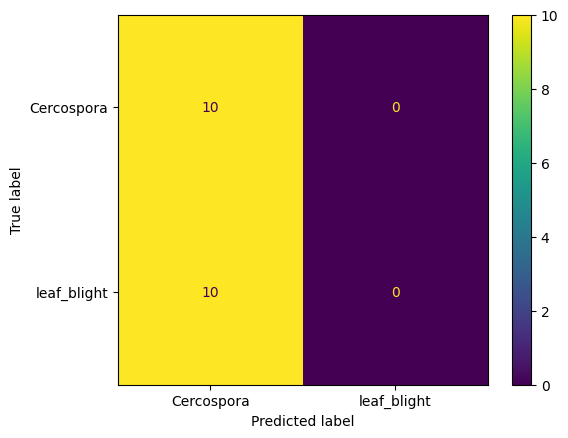

In [13]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, shuffle=False, class_mode='binary')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [14]:
print(classification_report(label, pred, target_names=['Cercospora', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.50      1.00      0.67        10
 leaf_blight       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



e:\ML_Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ML_Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ML_Labs\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
